In [1]:
import pandas as pd 
import pypyodbc 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import seaborn as sbn 

pd.set_option('display.max_columns', None) # dataframe yapısındaki tüm kolonların gözükmesi için 
pd.options.display.float_format = '{:,.0f}'.format

In [92]:
baglanti = pypyodbc.connect(
    'Driver={SQL Server};'
    'Server=LAPTOP-9C2N0EJN;'
    'Database=ETRADE2;'
    'Trusted_Connection=True;'
)

baglanti.commit()
islem = baglanti.cursor()

# SQL'den çekilen tabloyu DataFrame yapısına dönüştürme
df = pd.read_sql("SELECT * FROM SALES", baglanti) 

# DataFrame'i csv formatında kaydetme
df.to_csv('sales.csv', index=False) 

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,id,ficheno,date_,itemcode,itemname,brand,category1,category2,category3,category4,amount,price,totalprice,customercode,customername,customerbirhtdate,customergender,branch,city,district,region,date2,monthname_
0,1,1,2019-08-02 10:55:50,8658,GEZER 9768.00 AIR BLOW ZENNE*12*,GEZER,EV,TEKSTIL-GIYIM-AKSESUAR,AYAKKABI-TERLIK,AYAK GIYIM,1,18,18,2456844,Enver ÇOKYAŞA,1988-04-01,E,İstanbul,İstanbul,Sancaktepe,Marmara,2019-08-02,08.AĞUSTOS
1,2,1,2019-07-26 10:55:50,25500,FRITOLOY LAYS BAH.PARTI 150 GR *12*,FRITOLAY,GIDA,BISKUVI-CEREZ,CIPS,CIPSLER,4,6,24,2456844,Enver ÇOKYAŞA,1988-04-01,E,İstanbul,İstanbul,Sancaktepe,Marmara,2019-07-26,07.TEMMUZ
2,3,1,2019-01-06 10:55:50,2869,FABER KURSUN KALEM 4LU*18,KIRTASIYELER,EV,KITAP-DERGI-KIRTASIYE,KIRTASIYE,KIRTASIYE GERECLERI,9,6,50,2456844,Enver ÇOKYAŞA,1988-04-01,E,İstanbul,İstanbul,Sancaktepe,Marmara,2019-01-06,01.OCAK
3,4,2,2019-12-30 08:18:28,14756,MILUPA APTAMIL 900 GR 2,MILUPA,BEBEK,HAZIR YEMEK-MAMA,HAZIR COCUK YEMEKLERI,HAZIR MAMALAR,3,126,378,1705209,Esma nur AĞRAĞ,1977-10-09,K,Gaziantep,Gaziantep,Nurdağı,Güneydoğu Anadolu,2019-12-30,12.ARALIK
4,5,2,2019-10-07 08:18:28,27283,CEM PROMO 24 CM SERAMIK K.YARIK TAVA,CEM,EV,MUTFAK GERECLERI,MUTFAK ESYA-GERECLERI,TAVA,7,39,276,1705209,Esma nur AĞRAĞ,1977-10-09,K,Gaziantep,Gaziantep,Nurdağı,Güneydoğu Anadolu,2019-10-07,10.EKİM


### ZAMAN ANALİZLERİ

In [3]:
                                        ### Zaman Analizleri için Hazırlıklar ###
# date_ kolonu kullanılmayacağı için silindi
df.drop("date_", axis=1, inplace = True) 

# date2 kolonunu datetime tipine çevirme
df["date2"] = pd.to_datetime(df["date2"]) 

# date2 kolonundaki yıl bilgisini ayrı bir kolonda ele alma
df["year"] = df["date2"].dt.year 

 # date2 kolonundaki gün bilgisini ayrı bir kolonda ele alma
df["day"] = df["date2"].dt.day

# date2 kolonundaki hafta bilgisini ayrı bir kolonda ele alma
df["week"] = df["date2"].dt.isocalendar().week 

# monthname_ kolondaki ayların sayı ile gösterimini çıkarma
df["monthname_"] = df["monthname_"].apply(lambda x: x.split(".")[1]) 

# Grafik gösterimleri için aylari sıralama işlemi
ay_siralamasi = ["OCAK", "ŞUBAT", "MART", "NİSAN", "MAYIS", "HAZİRAN", "TEMMUZ", "AĞUSTOS", "EYLÜL", "EKİM", "KASIM", "ARALIK"]
df["monthname_"] = pd.Categorical(df["monthname_"], categories=ay_siralamasi, ordered=True)

# Mevsim bilgilerini kategorik olarak göstermek için fonksiyon
def mevsimler(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:
        return 'Sonbahar'
df['season'] = df['date2'].apply(mevsimler) 


# Grafik gösterimleri için mevsimleri sıralama işlemi
sezon_siralamasi = ['İlkbahar', 'Yaz', 'Sonbahar', 'Kış']
df['season'] = pd.Categorical(df['season'], categories=sezon_siralamasi, ordered=True)

In [4]:
df.head()

,id,ficheno,itemcode,itemname,brand,category1,category2,category3,category4,amount,price,totalprice,customercode,customername,customerbirhtdate,customergender,branch,city,district,region,date2,monthname_,year,day,week,season
0,1,1,8658,GEZER 9768.00 AIR BLOW ZENNE*12*,GEZER,EV,TEKSTIL-GIYIM-AKSESUAR,AYAKKABI-TERLIK,AYAK GIYIM,1,18,18,2456844,Enver ÇOKYAŞA,1988-04-01,E,İstanbul,İstanbul,Sancaktepe,Marmara,2019-08-02,AĞUSTOS,2019,2,31,Yaz
1,2,1,25500,FRITOLOY LAYS BAH.PARTI 150 GR *12*,FRITOLAY,GIDA,BISKUVI-CEREZ,CIPS,CIPSLER,4,6,24,2456844,Enver ÇOKYAŞA,1988-04-01,E,İstanbul,İstanbul,Sancaktepe,Marmara,2019-07-26,TEMMUZ,2019,26,30,Yaz
2,3,1,2869,FABER KURSUN KALEM 4LU*18,KIRTASIYELER,EV,KITAP-DERGI-KIRTASIYE,KIRTASIYE,KIRTASIYE GERECLERI,9,6,50,2456844,Enver ÇOKYAŞA,1988-04-01,E,İstanbul,İstanbul,Sancaktepe,Marmara,2019-01-06,OCAK,2019,6,1,Kış
3,4,2,14756,MILUPA APTAMIL 900 GR 2,MILUPA,BEBEK,HAZIR YEMEK-MAMA,HAZIR COCUK YEMEKLERI,HAZIR MAMALAR,3,126,378,1705209,Esma nur AĞRAĞ,1977-10-09,K,Gaziantep,Gaziantep,Nurdağı,Güneydoğu Anadolu,2019-12-30,ARALIK,2019,30,1,Kış
4,5,2,27283,CEM PROMO 24 CM SERAMIK K.YARIK TAVA,CEM,EV,MUTFAK GERECLERI,MUTFAK ESYA-GERECLERI,TAVA,7,39,276,1705209,Esma nur AĞRAĞ,1977-10-09,K,Gaziantep,Gaziantep,Nurdağı,Güneydoğu Anadolu,2019-10-07,EKİM,2019,7,41,Sonbahar


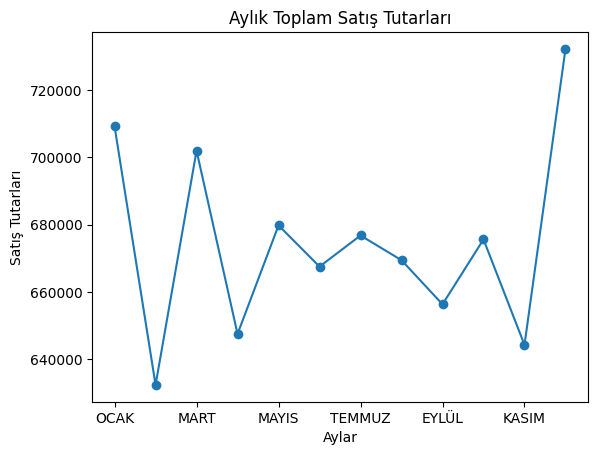

In [178]:
# Aylık toplam satış tutarları
aylik_toplam_satis = df.groupby("monthname_")["totalprice"].sum()
aylik_toplam_satis.plot(marker='o')
plt.title("Aylık Toplam Satış Tutarları")
plt.xlabel("Aylar")
plt.ylabel("Satış Tutarları")
plt.show()

In [175]:
# Seçilen ayın günlük toplam satış tutarları
def gunluk_toplam(ay):
    aylar = df[df["monthname_"] == ay]
    gunluk_satis_toplami = aylar.groupby("day")["totalprice"].sum()
    gunluk_satis_toplami.plot(marker="o")
    plt.title(f"{ay}")
    plt.xlabel("Günler")
    plt.ylabel("Satış Tutarları")
    plt.show()

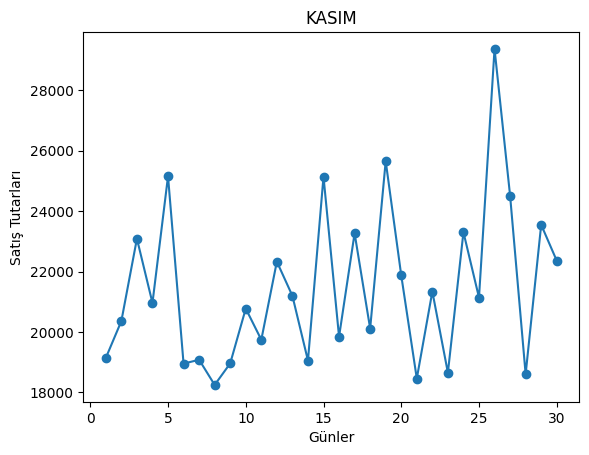

In [177]:
gunluk_toplam("KASIM")

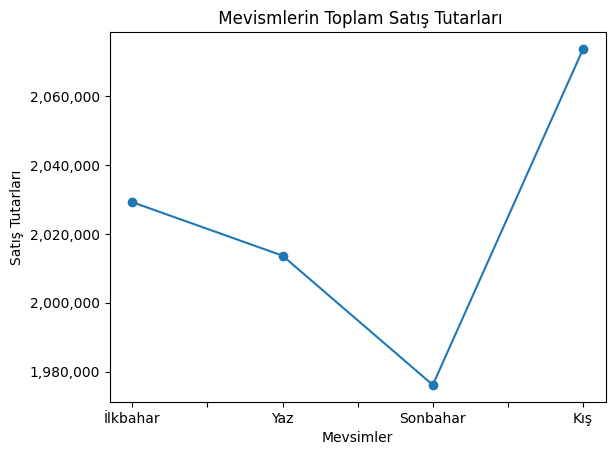

In [179]:
# Mevismlere göre toplam satış tutarları
mevsimlik_toplam_satis = df.groupby("season")["totalprice"].sum()
ax = mevsimlik_toplam_satis.plot(marker="o")
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)
plt.title(" Mevismlerin Toplam Satış Tutarları")
plt.xlabel("Mevsimler")
plt.ylabel("Satış Tutarları")
plt.show()

### MARKA ANALİZLERİ

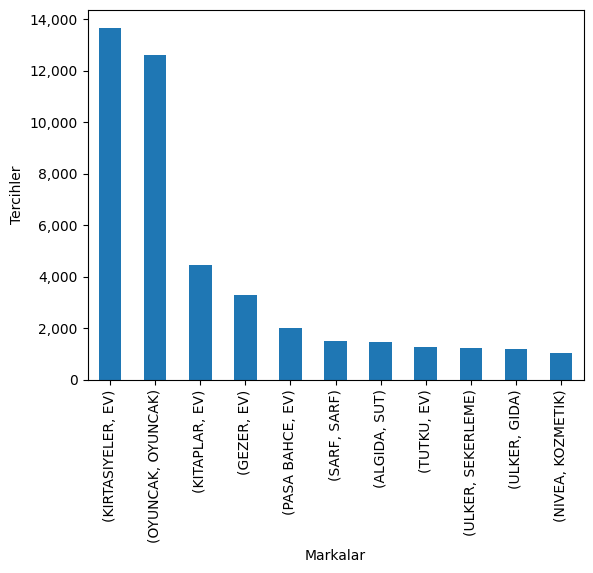

In [7]:
# Markaların "category1"'e göre tercih sayısı
marka_kategori1 = df.groupby("brand")["category1"].value_counts().sort_values(ascending=False).head(11) # grafik gösteriminde anlamsızlık olduğundan ilk 11'i seçildi
ax = marka_kategori1.plot(kind="bar")
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)
plt.xlabel("Markalar")
plt.ylabel("Tercihler")
plt.show()

In [169]:
# Markaların cinsiyete göre tercihi
def cinsiyet_marka_tercihi(marka):
    secilen_marka = df[df["brand"] == marka]
    cinsiyet_sayisi = secilen_marka.groupby("customergender").size()
    print(f"MARKA: {marka}\n{cinsiyet_sayisi}")
    cinsiyet_sayisi.plot(kind='bar')
    plt.title(f'{marka}')
    plt.xlabel('Cinsiyet')
    plt.ylabel('Müşteri Sayısı')
    plt.xticks(rotation=0)
    plt.show()

MARKA: GEZER
customergender
E    1549
K    1746
dtype: int64


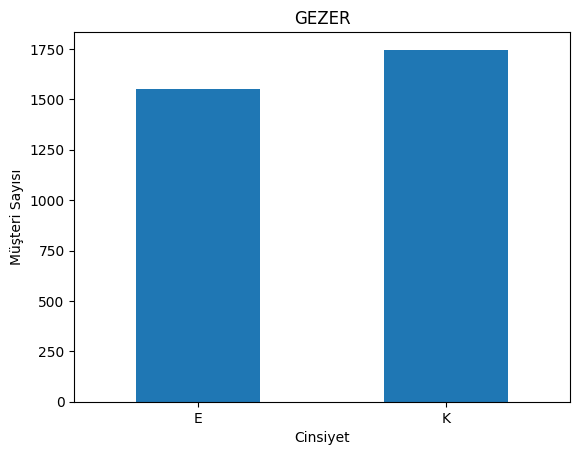

In [170]:
cinsiyet_marka_tercihi("GEZER")

### KATEGORİ ANALİZLERİ

In [173]:
# Seçilen markanın seçilen kategoriye göre tercih sayısı
def kategori_miktari(dataframe, category ,marka_turu):
    marka_kategori = dataframe.groupby("brand")[category].value_counts().loc[marka_turu]
    marka_kategori.plot(kind="bar")
    plt.title(f"{marka_turu}")
    plt.xlabel(f"{category}")
    plt.ylabel("Müşteri Sayısı")
    plt.show()

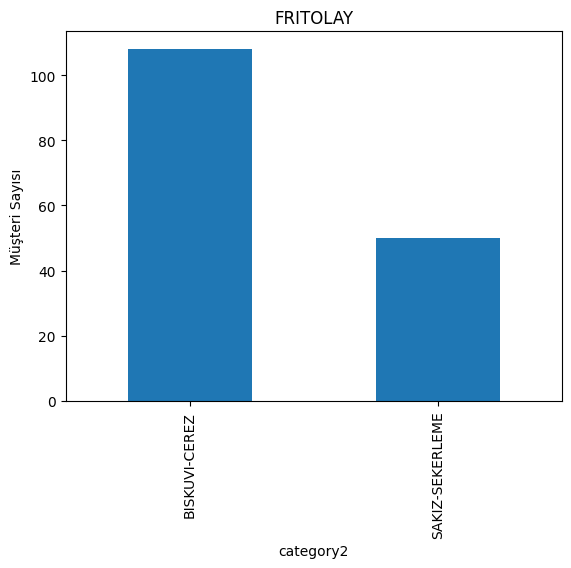

In [174]:
kategori_miktari(df, "category2","FRITOLAY")

In [50]:
# Seçilen kategorideki ürünlerin minimum, maksimum, ortalama ve toplam satış tutarları
def category_price(category, scale = ""):
    mininum = df.groupby(category)["totalprice"].min().sort_values(ascending=False)
    maximum = df.groupby(category)["totalprice"].max().sort_values(ascending=False)
    mean = df.groupby(category)["totalprice"].mean().sort_values(ascending=False)
    total = df.groupby(category)["totalprice"].sum().sort_values(ascending=False)
    
    if scale == "min":
        ax = mininum.plot(kind="bar")
        formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
        ax.yaxis.set_major_formatter(formatter)
        plt.xlabel("Kategoriler")
        plt.ylabel("Minimum Satış Tutarları")
        plt.show()
    
    elif scale == "max":
        ax = maximum.plot(kind="bar")
        formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
        ax.yaxis.set_major_formatter(formatter)
        plt.xlabel("Kategoriler")
        plt.ylabel("Maksimum Satış Tutarları")
        plt.show()
        
    elif scale == "mean":
        ax = mean.plot(kind="bar")
        formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
        ax.yaxis.set_major_formatter(formatter)
        plt.xlabel("Kategoriler")
        plt.ylabel("Ortalama Satış Tutarları")
        plt.show()
        
    else:
        ax = total.plot(kind="bar")
        formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
        ax.yaxis.set_major_formatter(formatter)
        plt.xlabel("Kategoriler")
        plt.ylabel("Toplam Satış Tutarları")
        plt.show()

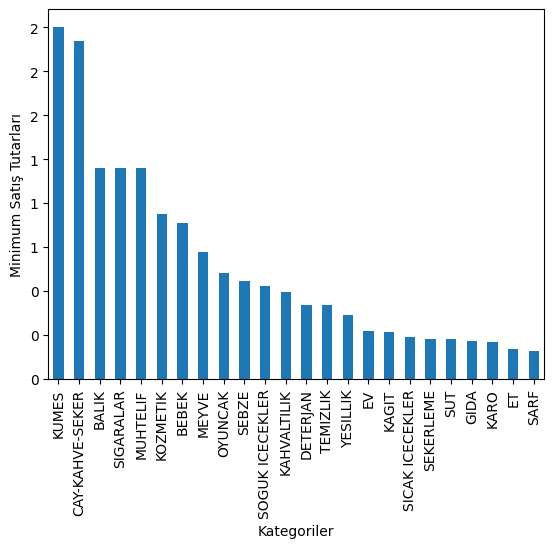

In [53]:
category_price("category1", "min")

In [180]:
# Kategorilere göre ürünlerin ne miktarda alındığı
def category_amount(category):
    miktar = df.groupby(category)["amount"].sum().sort_values().head(11)
    miktar.plot(kind="bar")
    plt.title(f"{category}")
    plt.xlabel("Kategoriler")
    plt.ylabel("Miktar")
    plt.show()

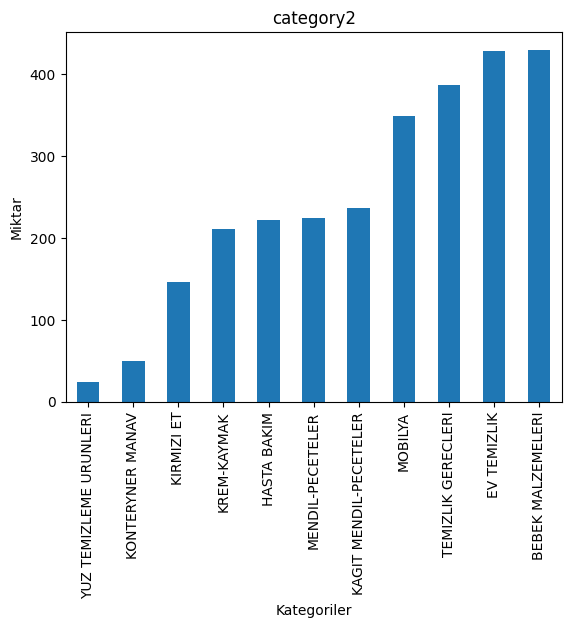

In [181]:
category_amount("category2")

### ÜRÜN ANALİZİ

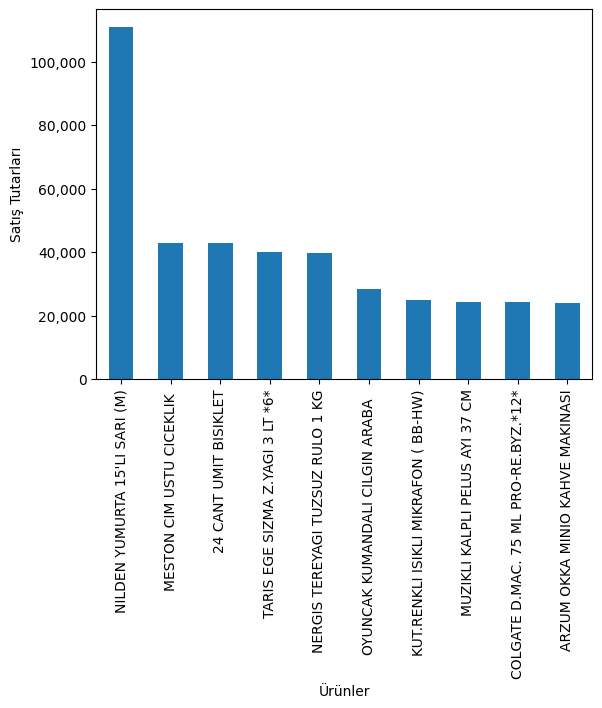

In [13]:
# Her bir ürünün toplam satış tutarı
urun_basina_toplam_satislar = df.groupby("itemname")["totalprice"].sum().sort_values(ascending=False).head(10)
ax = urun_basina_toplam_satislar.plot(kind="bar")
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)
plt.xlabel("Ürünler")
plt.ylabel("Satış Tutarları")
plt.show()

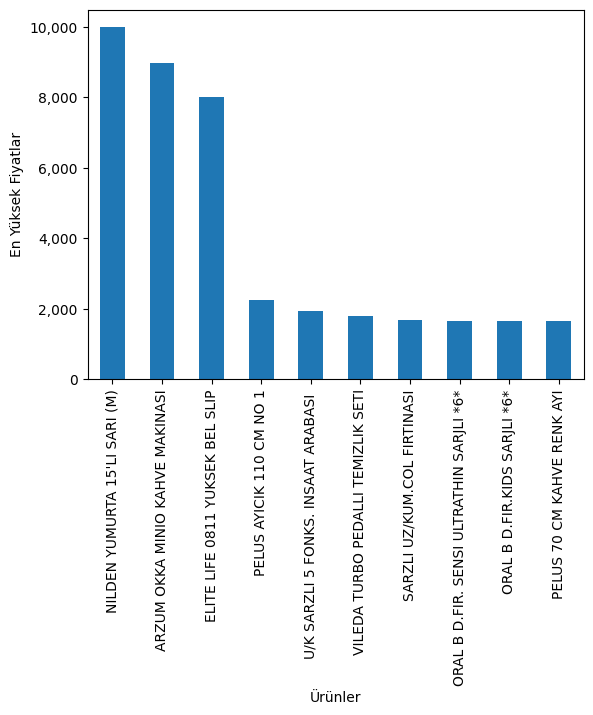

In [14]:
# En yüksek fiyata satılan ürünler
en_yüksek_satanlar = df.groupby("itemname")["totalprice"].max().sort_values(ascending = False).head(10)
ax = en_yüksek_satanlar.plot(kind="bar")
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)
plt.xlabel("Ürünler")
plt.ylabel("En Yüksek Fiyatlar")
plt.show()

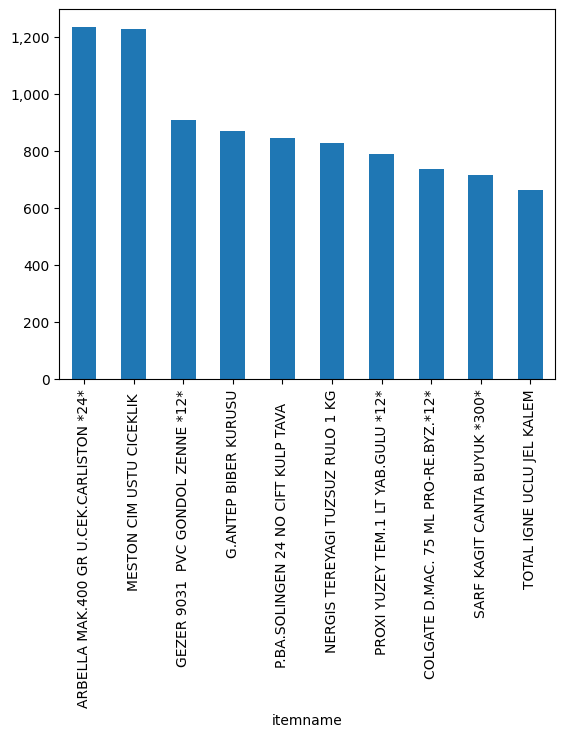

In [15]:
# En fazla satılan ürünler
en_fazla_satan_urunler = df.groupby("itemname")["amount"].sum().sort_values(ascending = False).head(10)
ax = en_fazla_satan_urunler.plot(kind="bar")
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.yaxis.set_major_formatter(formatter)
plt.show()

### KONUM ANALİZLERİ

region
Marmara             2,939,314
İç Anadolu          1,648,972
Ege                   960,708
Akdeniz               828,063
Güneydoğu Anadolu     715,073
Doğu Anadolu          512,895
Karadeniz             487,791
Name: totalprice, dtype: float64


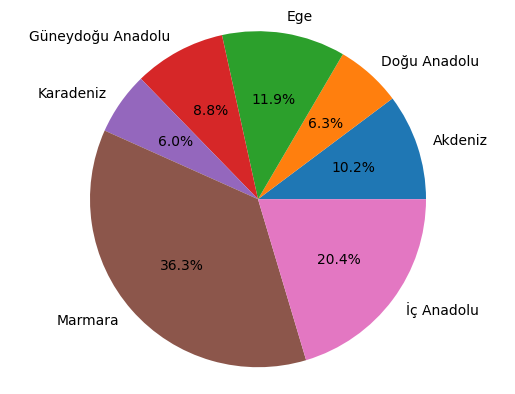

In [73]:
# Bölgelerin toplam satış tutarları
bolge_satis_toplamlari = df.groupby("region")["totalprice"].sum()
print(bolge_satis_toplamlari.sort_values(ascending=False))
plt.pie(bolge_satis_toplamlari, labels=bolge_satis_toplamlari.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [184]:
# Seçilen bölgedeki şehirlerin toplam satış tutarları
def bolge_satis_tutarlari(bolge):
    bolgeler = df[df["region"] == bolge]
    satis_tutarlari = bolgeler.groupby("city")["totalprice"].sum().sort_values()
    ax = satis_tutarlari.plot(kind = "bar")
    formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
    ax.yaxis.set_major_formatter(formatter)
    plt.title(f"{bolge} Bölgesi")
    plt.xlabel("Şehirler")
    plt.ylabel("Satış Tutarları")
    plt.show()

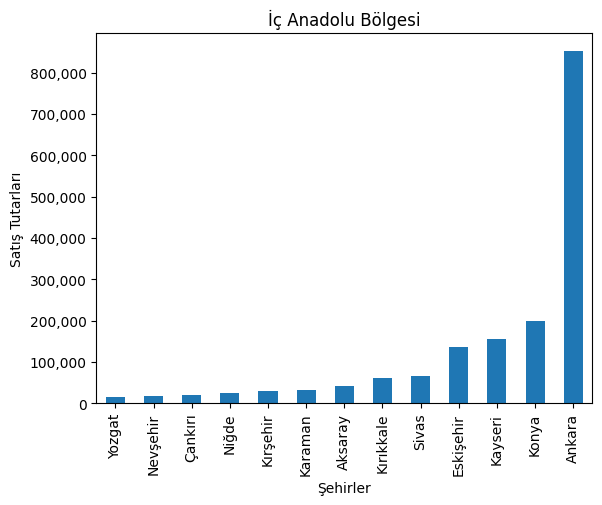

In [185]:
bolge_satis_tutarlari("İç Anadolu")

In [186]:
# Seçilen bölgedeki markaların ne kadar tercih edildiği
def bolge_marka_tercihi(bolge):
    bolgeler = df[df["region"] == bolge]
    marka_tercihi = bolgeler.groupby("brand")["amount"].sum().sort_values(ascending=False).head(11) # Grafik içinde düzgün gözükmesi için ilk 11'i alındı
    plt.title(f"{bolge} Bölgesi")
    plt.xlabel("Markalar")
    plt.ylabel("Miktar")
    marka_tercihi.plot(kind="bar")

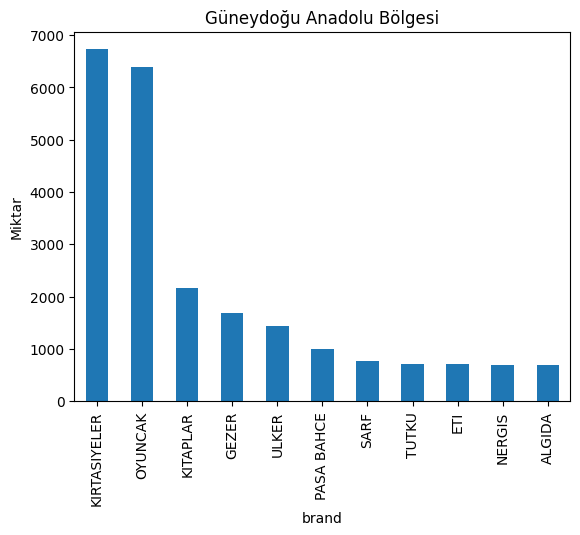

In [187]:
bolge_marka_tercihi("Güneydoğu Anadolu")

In [196]:
# Cinsiyete göre seçilen bölgedeki markaların ne kadar tercih edildiği
def cinsiyet_tercihi(bolge):
    bolgeler = df[df["region"] == bolge]
    plt.title(f"{bolge} Bölgesi")
    plt.ylabel("Miktar")
    tercih_sayisi = bolgeler.groupby(["customergender","brand"])["amount"].sum().sort_values().head(10)
    tercih_sayisi.plot(kind = "bar")

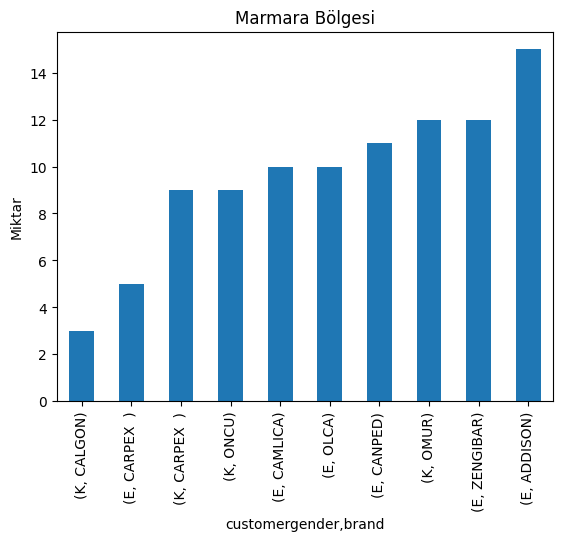

In [197]:
cinsiyet_tercihi("Marmara")